 ###  Exploring the relationship of the gasoline consumption on the weight and engine sizes in cylinders of 32 cars

In [3]:
library(rjags)

cat("model{

 # likelihood
 for (i in 1:N){
  mpg[i] ~ dnorm(mu[i], psi)
  mu[i] <- beta0 + beta1*weight[i] + beta2*sixcyl[i] + beta3*eightcyl[i]
 
 }
 
  # priors
 beta0 ~ dnorm(0.0, 1.0E-04)
 beta1 ~ dnorm(0.0, 1.0E-04)
 beta2 ~ dnorm(0.0, 1.0E-04)
 beta3 ~ dnorm(0.0, 1.0E-04)
 psi ~ dgamma(0.01, 0.01)
 sigma2 <- 1.0/psi # variance
 
 # predictive
 mu.new <- beta0 + beta1 * weight.new + beta2 * sixcyl.new + beta3 * eightcyl.new
 mpg.new ~ dnorm(mu.new, psi)
 

}",
    
    file = "mpg.jag"
)





Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 32
   Unobserved stochastic nodes: 6
   Total graph size: 208

Initializing model




Iterations = 10:10000
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD  Naive SE Time-series SE
beta0  33.8843 2.09885 0.0383196      0.0794596
beta1  -3.1643 0.80692 0.0147322      0.0326265
beta2  -4.2732 1.47747 0.0269748      0.0341206
beta3  -6.1202 1.76104 0.0321520      0.0547594
psi     0.1526 0.04138 0.0007555      0.0007556
sigma2  7.1086 3.10752 0.0567352      0.0585822

2. Quantiles for each variable:

           2.5%     25%     50%     75%   97.5%
beta0  29.86561 32.6598 33.8664 35.1707 37.8124
beta1  -4.74000 -3.6860 -3.1501 -2.6486 -1.5937
beta2  -7.26481 -5.2406 -4.2863 -3.3129 -1.4030
beta3  -9.63224 -7.2604 -6.1365 -4.9556 -2.6026
psi     0.08357  0.1237  0.1477  0.1788  0.2438
sigma2  4.10151  5.5918  6.7718  8.0870 11.9663


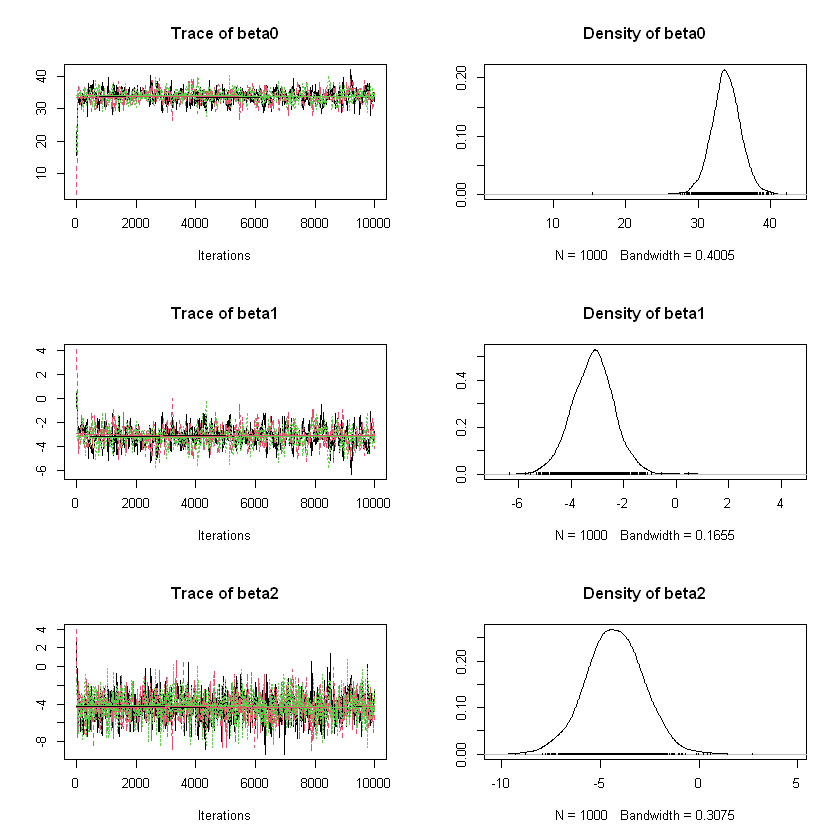

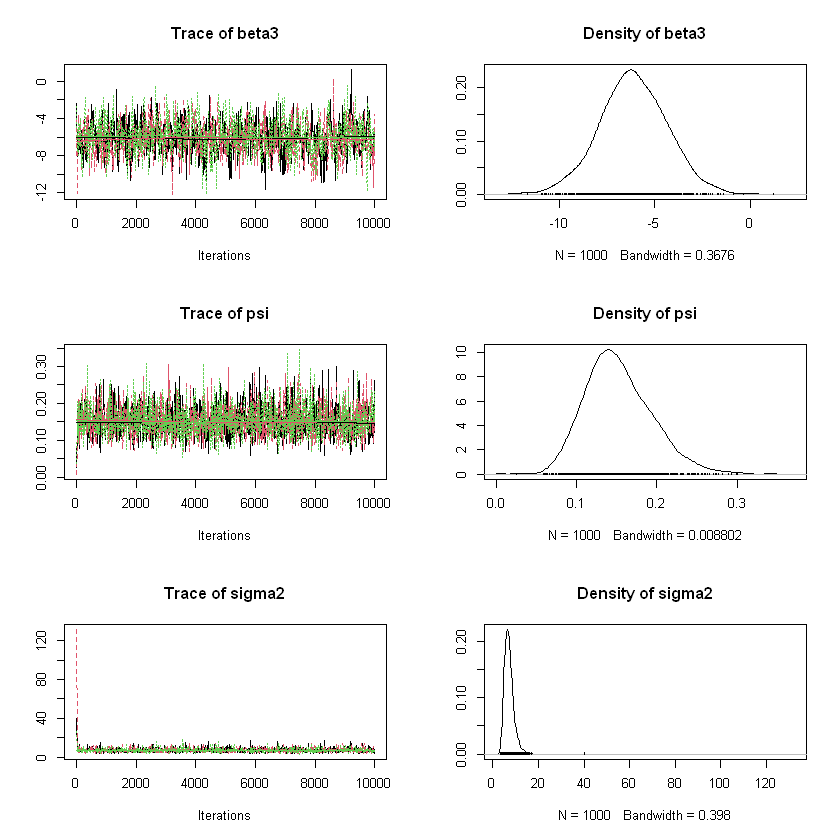

In [4]:
# MCMC
mpg.inits <- list(list(beta0=2, beta1=1, beta2=2, beta3=2, psi=1), list(beta0=2, beta1=5, beta2=2, beta3=1, psi=0.5), 
                  list(beta0=2, beta1=1, beta2=1, beta3=1, psi=0.05))

mpg.data = list(mpg=c( 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7,
                       32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4), 
                weight=c( 2.620, 2.875, 2.320,3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.440, 3.440, 4.070, 3.730,
                          3.780, 5.250, 5.424, 5.345, 2.200, 1.615, 1.835, 2.465, 3.520, 3.435, 3.840, 3.845, 1.935, 2.140,
                          1.513, 3.170, 2.770, 3.570, 2.780), 
                sixcyl=c( 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), 
                eightcyl=c(0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0), N=32, 
                weight.new = 3.5, sixcyl.new = 0, eightcyl.new = 0)

mpg.model <- jags.model(file = "mpg.jag", data = mpg.data, inits = mpg.inits, n.chains = 3, n.adapt = 2000)

mpg.par <- c("beta0", "beta1", "beta2", "beta3", "psi", "sigma2")

mpg.res <- coda.samples(model = mpg.model, variable.names = mpg.par, n.iter = 10000, thin = 10)

summary(mpg.res)

#  plots of the marginal distributions for each parameter
plot(mpg.res)



Iterations = 10010:20000
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      22.82171        2.94048        0.05369        0.05842 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
16.97 20.88 22.80 24.76 28.60 


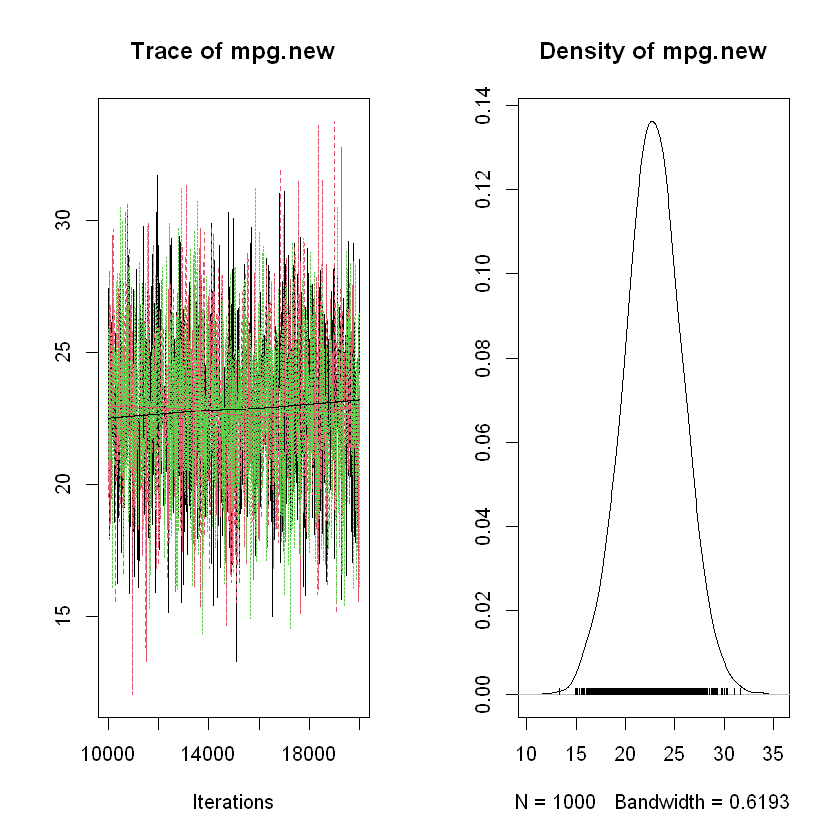

In [6]:

# Looking at the regression coefficients beta2 and beta3 for
# sixcyl and eightcyl variables respectively, it clearly shows that moving
# from six cylinders (beta2 = -4.2732) to eight cylinders (beta3 = -6.1202)
# reduces the mpg by 1.847. Therefore, we can say that the mpg of a car
# increases with decreasing number of cylinders.



# predictive distribution for a new 4 cylinder car with weight = 3.5
mpg.par <- c("mpg.new")

mpg.res <- coda.samples(model = mpg.model, variable.names = mpg.par, n.iter = 10000, thin = 10)

summary(mpg.res) 

plot(mpg.res)